In [1]:
# Stephen Iota
# September 15, 2021
# EE503 HW 3 problem 8

In [2]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(context='notebook', style='ticks', font_scale=1.5)#, rc={'lines.linewidth': 1.1})

# Exponential random variable

* (a) Generate instances of exponential random distribution from a uniform distributed random variable, `random.uniform(0,1)`.
* (b) Use the built-in function `random.exponential()` to generate the same number of instances.
* (c) Compare the histograms of `a` and `b`.


An exponential r.v. is a continuous r.v. whose probability density function is given by
$$
f(x) = 
    \begin{cases}
    \lambda e^{-\lambda x} & x \geq 0 \\
    0 & x < 0
    \end{cases}
$$
for some $\lambda > 0$.

It is possible to generate any random variable using an instantiation of a uniform r.v., thanks to the following theorem.

**Thm.** Let $U$ be a `uniform(0,1)` r.v. For any continuous distribution function $F$ if we define the r.v. $X$ by
$$
X = F^{-1}(U) 
$$
then the r.v. $X$ has distribution $F$.

Thus, we can use the CDF of the exponential r.v. to map values from `uniform(0,1)` space to `exponential($\lambda$)` space.
$F_{\exp}^{-1} \colon U \rightarrow X$

The CDF $F_{\exp}$ is given by
$$
F_{\exp} = P\{X \leq x\} = 1 - e^{\lambda x}
$$
and its inverse by
$$
F_{\exp}^{-1}(u) = -\frac{1}{\lambda} \log{u}
$$

In [4]:
random = default_rng(seed=1234)

n = 10_000
uniform_instances = random.uniform(size=n)

Here we introduce optional param `scale` defined as $1/\lambda$, to keep consistency with `np.random.exponential` implementation.

In [5]:
def uniform_to_exp(u, scale=1.0):
    '''Maps values from uniform distribution (0,1] to exponential distribution. 
    
        Parameters
        ----------
        x : float or array_like of floats
            Instance(s) generated from a uniform(0,1) distribution
        scale : float, optional
            The scale parameter, scale = 1/lambda. Must be > 0.
            
        Returns
        -------
        out : ndarray or scalar
            Mapped values from input uniform distribution to exp(scale) distribution.
    '''
    return  - scale * np.log(u)

In [6]:
uni_to_exp = uniform_to_exp(uniform_instances, scale=2)

Now, we use `numpy`'s built-in exponential r.v. generator.

In [7]:
exp_instances = random.exponential(size=n, scale=2)

And finally, we plot the histogram of both methods to compare.

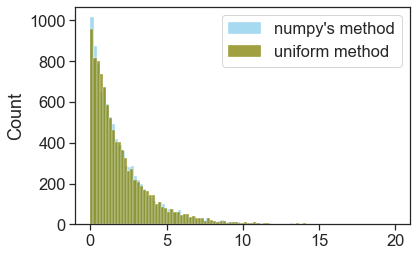

In [8]:
sns.histplot(exp_instances, label=r"numpy's method", color='skyblue')
sns.histplot(uni_to_exp, label='uniform method', color='olive')
plt.legend()
plt.show()

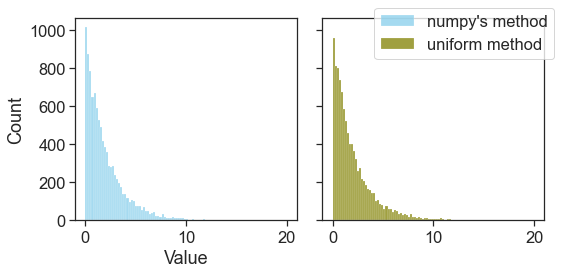

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

sns.histplot(exp_instances, label="numpy's method", color='skyblue', ax=axs[0])
sns.histplot(uni_to_exp, label='uniform method', color='olive', ax=axs[1])

axs[0].set_xlabel('Value')
#axs[1].set_xlabel('Value')
fig.legend(loc='upper right')
fig.tight_layout()

plt.show()